In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

import keras
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation
from keras.layers import Dropout, Dense, Flatten, BatchNormalization


In [ ]:
train_dir = "C:/Users/PC/Desktop/DATASET/TRAIN"
test_dir = "C:/Users/PC/Desktop/DATASET/TEST"


<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\PC\AppData\Local\Temp\ipykernel_17640\2875909544.py:1: SyntaxWarning: invalid escape sequence '\P'
  train_dir = "C:/Users\PC/Desktop/DATASET/TRAIN"


In [33]:
train_datagen = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip = True,
                                   rescale=1./255,
                                   validation_split=0.2)


val_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split=0.5)

In [34]:
Batch_size = 32

train_set = train_datagen.flow_from_directory(train_dir, class_mode='binary',
                                              batch_size = Batch_size,
                                              target_size=(64, 64))


val_set = val_datagen.flow_from_directory(test_dir, class_mode='binary',
                                          batch_size = Batch_size,
                                          target_size=(64, 64),
                                          subset= 'training')
   

test_set = val_datagen.flow_from_directory(test_dir, class_mode = 'binary',
                                           batch_size = Batch_size, 
                                           target_size=(64, 64),
                                           subset= 'validation')

Found 22564 images belonging to 2 classes.
Found 1257 images belonging to 2 classes.
Found 1256 images belonging to 2 classes.


In [35]:
train_set.class_indices

{'O': 0, 'R': 1}

In [36]:
train_set.image_shape

(64, 64, 3)

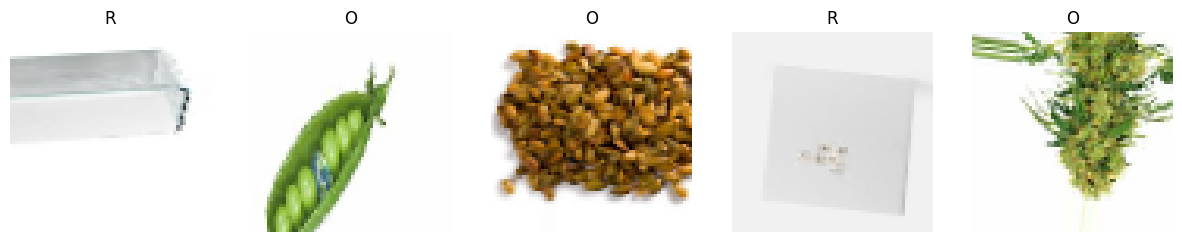

In [37]:
def print_sample_images(generator, num_images=5):
    images, labels = next(generator)
    class_names = list(generator.class_indices.keys())
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis('off')
    plt.show()

print_sample_images(train_set)


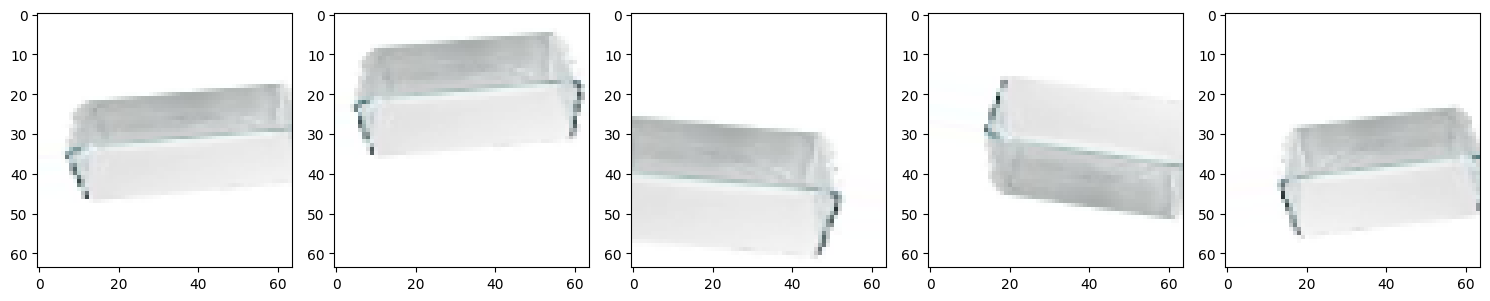

In [38]:
def Images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(15,15))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_img = [train_set[0][0][0] for i in range(5)]
Images(augmented_img)

In [39]:
model = Sequential([                
  Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)), 
  MaxPool2D((2,2)),
  Conv2D(32, (3,3), activation='relu', padding='same'),
  MaxPool2D((2,2)),
  Conv2D(64, (3,3), activation='relu', padding='same'),
  MaxPool2D((2,2)),
  Flatten(),
  Dense(units=128, activation="relu"),
  Dense(units=1, activation="sigmoid")
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 553,185 (2.11 MB)

 Trainable params: 553,185 (2.11 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(
    train_set,
    epochs = 5,
    validation_data= val_set,
    steps_per_epoch=int(len(train_set)/Batch_size),
    verbose=1
)

Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.4857 - loss: 0.7350 - val_accuracy: 0.7319 - val_loss: 0.5445
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.7366 - loss: 0.5328 - val_accuracy: 0.8210 - val_loss: 0.4796
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.7927 - loss: 0.4526 - val_accuracy: 0.8234 - val_loss: 0.4683
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.7796 - loss: 0.4638 - val_accuracy: 0.8234 - val_loss: 0.4481
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.7975 - loss: 0.4694 - val_accuracy: 0.7971 - val_loss: 0.4876


In [42]:
import seaborn as sns
sns.set(style="whitegrid")


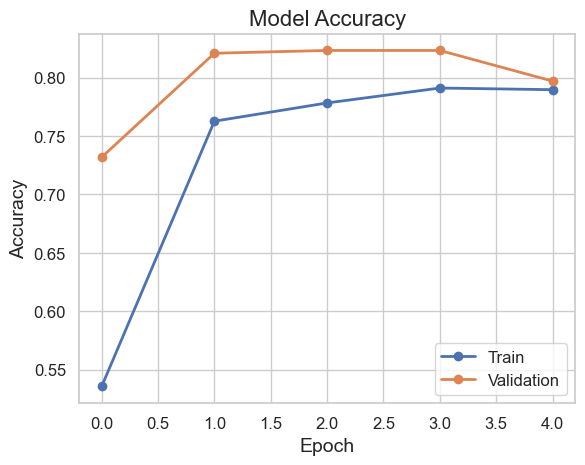

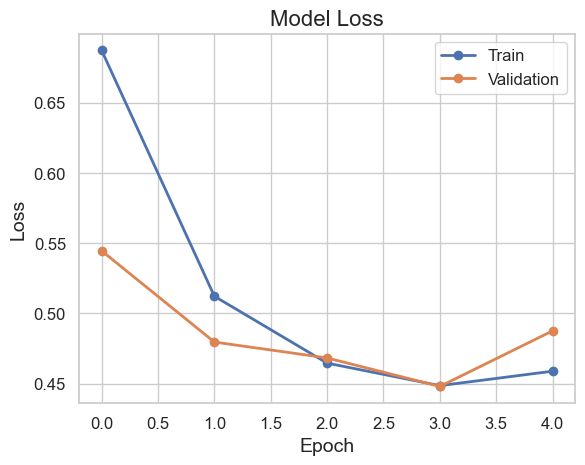

In [44]:
# Plot training and validation accuracy
sns.set(style="whitegrid")
plt.plot(history.history['accuracy'], label='Train', linewidth=2, marker='o', markersize=6)
plt.plot(history.history['val_accuracy'], label='Validation', linewidth=2, marker='o', markersize=6)
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train', linewidth=2, marker='o', markersize=6)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2, marker='o', markersize=6)
plt.title('Model Loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [45]:
loss, accuracy = model.evaluate(test_set, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Testing Accuracy:  0.8838


In [46]:
base_model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(64, 64, 3))
base_model.trainable = False
model1 = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

C:\Users\PC\AppData\Local\Temp\ipykernel_17640\668289945.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(64, 64, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [47]:
model1.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [48]:
history1 = model1.fit(
    train_set,
    epochs=5,
    validation_data=val_set,
    verbose=1
)


Epoch 1/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 82s 113ms/step - accuracy: 0.8176 - loss: 0.4315 - val_accuracy: 0.8305 - val_loss: 0.4455
Epoch 2/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.8592 - loss: 0.3344 - val_accuracy: 0.8457 - val_loss: 0.3857
Epoch 3/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.8625 - loss: 0.3299 - val_accuracy: 0.8504 - val_loss: 0.4187
Epoch 4/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.8651 - loss: 0.3133 - val_accuracy: 0.8441 - val_loss: 0.4335
Epoch 5/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8741 - loss: 0.2953 - val_accuracy: 0.8528 - val_loss: 0.4063


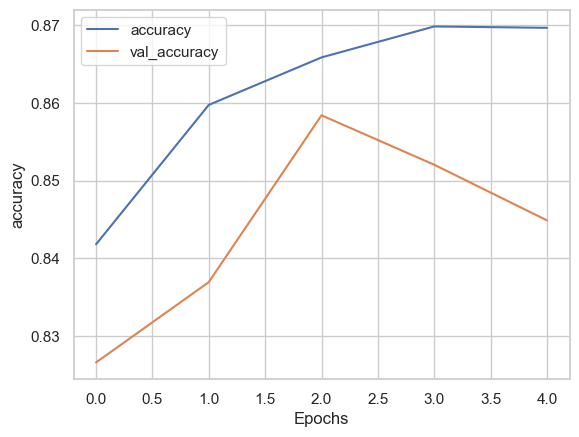

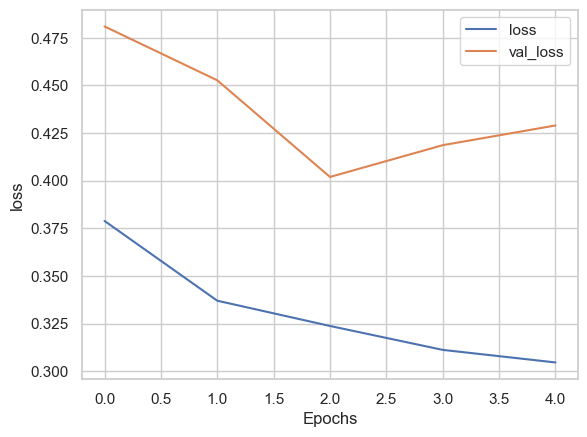

In [ ]:
def plot_graphs(history, string):
    sns.set(style="whitegrid")
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Plot accuracy and loss for model1
plot_graphs(history1, "accuracy")
plot_graphs(history1, "loss")

In [ ]:
loss, accuracy = model1.evaluate(test_set, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.8161


In [53]:
model2 = Sequential([
   Conv2D(32, (3,3), input_shape=(64, 64, 3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Conv2D(32, (3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Conv2D(64, (3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Conv2D(128, (3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Flatten(),
   Dense(64, activation="relu"),
   Dense(32, activation="relu"),
   Dense(1, activation="sigmoid")
])

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy',
               metrics = ['accuracy'])

model2.summary()

C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,745 (920.88 KB)

 Trainable params: 235,745 (920.88 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
history_2 = model2.fit(
    train_set,
    epochs = 10,
    validation_data= val_set,
    steps_per_epoch=int(len(train_set)/Batch_size),
    verbose=1
)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.5330 - loss: 0.6813 - val_accuracy: 0.7947 - val_loss: 0.5870
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7657 - loss: 0.5420 - val_accuracy: 0.8449 - val_loss: 0.4323
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7951 - loss: 0.4708 - val_accuracy: 0.8194 - val_loss: 0.4764
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7866 - loss: 0.5009 - val_accuracy: 0.8043 - val_loss: 0.4745
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7921 - loss: 0.4743 - val_accuracy: 0.7971 - val_loss: 0.4685
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8007 - loss: 0.4356 - val_accuracy: 0.8178 - val_loss: 0.4464
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8069 - loss: 0.4354 - val_accuracy: 0.8369 - val_loss: 0.4350
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7965 - loss: 0.4712 - val_accuracy: 0.8210 - v

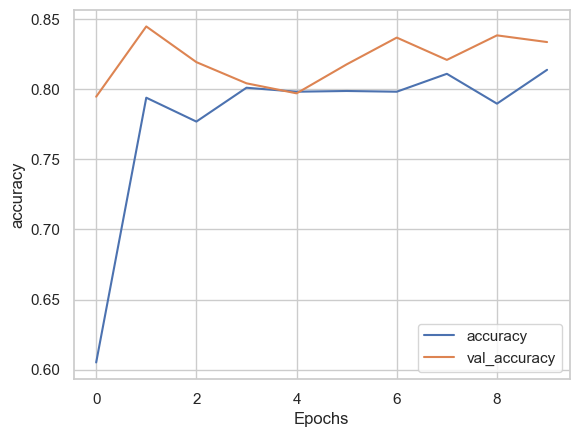

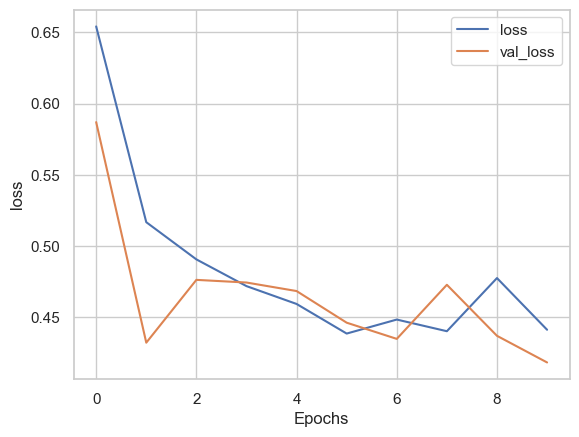

In [55]:
def plot_graphs(history, string):
    sns.set(style="whitegrid")
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history_2, "accuracy")
plot_graphs(history_2, "loss")

In [56]:
loss, accuracy = model2.evaluate(test_set, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.8559


In [57]:
model2.save("waste_AG_model.h5")

In [ ]:

test_image = image.load_img(r"C:/Users/PC/Desktop/DATASET/TEST/botella.webp", target_size = (64, 64))

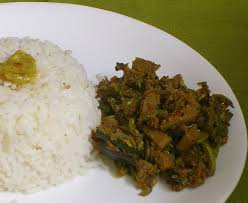

In [ ]:
Image.open(r"C:/Users/PC/Desktop/DATASET/TEST/botella.webp")

In [ ]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)


result = model2.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [ ]:

train_set.class_indices

{'O': 0, 'R': 1}

In [65]:
print(result)



[[0.]]


In [66]:
if result[0][0] == 1:
    prediction = ' Inorganic  Waste'
else:
    prediction = 'Organic Waste'

In [67]:
print(prediction)

Organic Waste
